# Runge's phenomenon

In [4]:
using Plots

In [5]:
f(x) = 1/(1+25x^2)

f (generic function with 1 method)

In [6]:
x_points = -1:0.01:1

-1.0:0.01:1.0

In [7]:
y_points = f.(x_points)

201-element Vector{Float64}:
 0.038461538461538464
 0.03921184197627684
 0.03998400639744103
 0.040778876541951274
 0.0415973377703827
 0.042440318302387266
 0.043308791684711995
 0.044203779423140674
 0.04512635379061372
 0.04607764082478977
 ⋮
 0.04512635379061372
 0.044203779423140674
 0.043308791684711995
 0.042440318302387266
 0.0415973377703827
 0.040778876541951274
 0.03998400639744103
 0.03921184197627684
 0.038461538461538464

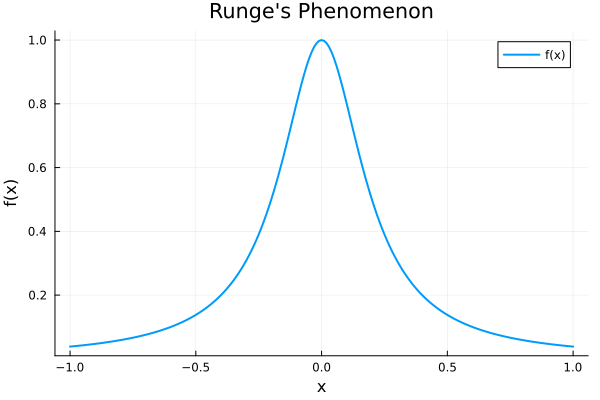

In [8]:
# scatter(x_points, y_points, label="f(x)")
plot(x_points, y_points, label="f(x)", xlabel="x", ylabel="f(x)", title="Runge's Phenomenon", lw=2)

In [9]:
# implement langrange interpolation 

# sum of y_i * l_i(x)
# l_i(x) = product of (x - x_j)/(x_i - x_j) for j != i

l_i(x,i,x_points) = prod([(x - x_points[j])/(x_points[i] - x_points[j]) for j in 1:length(x_points) if j != i])
function langrange_interpolation(x, x_points, y_points)
    sum = 0
    for i in 1:length(x_points)
        sum += y_points[i] * l_i(x,i,x_points)
    end
    return sum
end


langrange_interpolation (generic function with 1 method)

In [10]:
# create a points between a to b with n points with function f
function create_points(f, a, b, n)
    x_points = range(a, b, length=n)
    y_points = f.(x_points)
    return x_points, y_points
end

create_points (generic function with 1 method)

In [11]:
function example(n=5)
    x_points, y_points = create_points(f, -1, 1, n)
    x_interpolation = -1:0.01:1
    y_interpolation = [langrange_interpolation(x, x_points, y_points) for x in x_interpolation]
    scatter!(x_points, y_points, label="points")
    plot!(x_interpolation, y_interpolation, label="$n points")
    
end

example (generic function with 2 methods)

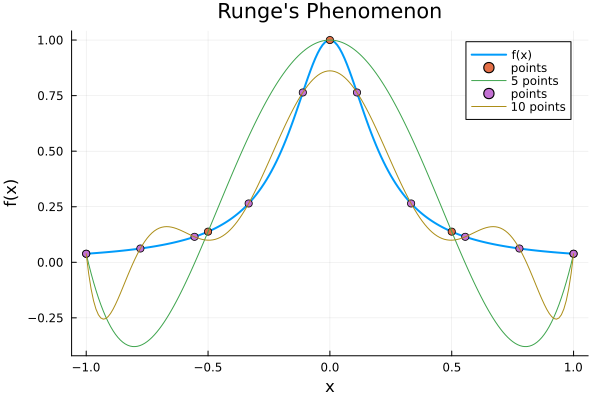

In [12]:
example(5)
example(10)

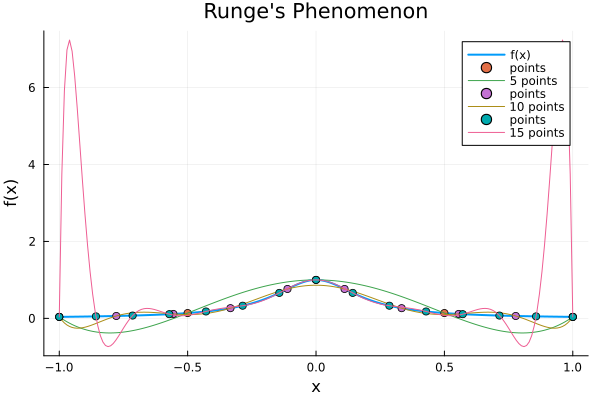

In [13]:
example(15)

In [14]:
create_points(f, -1, 1, 5)

(-1.0:0.5:1.0, [0.038461538461538464, 0.13793103448275862, 1.0, 0.13793103448275862, 0.038461538461538464])